In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Gebruiker\Desktop\Data Analysis\Portfolio Projects\03. books_data.csv")
df.head()

,Unnamed: 0,Books,Authors,Language,First_Published,Sales_in_millions
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,3,And Then There Were None,Agatha Christie,English,1939,100.0
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0


In [4]:
# The second index is unnecessary so we'll remove it

df.set_index(['Unnamed: 0'], inplace=True)
df

,Books,Authors,Language,First_Published,Sales_in_millions
Unnamed: 0,,,,,
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,And Then There Were None,Agatha Christie,English,1939,100.0
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0
...,...,...,...,...,...
285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999–present,15.0
286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992–present,15.0
287,The Riftwar Cycle,Raymond E. Feist,English,1982–present,15.0


In [5]:
# Let's have a general look at the data

print(df.shape)
print(df.info())

(290, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Books              290 non-null    object 
 1   Authors            290 non-null    object 
 2   Language           290 non-null    object 
 3   First_Published    290 non-null    object 
 4   Sales_in_millions  288 non-null    float64
dtypes: float64(1), object(4)
memory usage: 13.6+ KB
None


In [6]:
df.describe()

,Sales_in_millions
count,288.000000
mean,49.996875
std,64.684632
min,10.000000
25%,16.000000
50%,25.000000
75%,50.000000
max,600.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()
df.replace(np.nan, '0', inplace=True)

In [47]:
# replacing the NaN values with 0 gave the Sales_in_millions column the dtype of 'object' so we turn it back to 'float'
df['Sales_in_millions'].unique()

df['Sales_in_millions'] = pd.to_numeric(df['Sales_in_millions'])

In [51]:
df_books = df.groupby('Language')['Books'].count()
df_books

Language
Chinese         6
Czech           1
Dutch           2
English       210
French         10
German          6
Gujarati        1
Italian         5
Japanese       26
Norwegian       4
Polish          1
Portuguese      1
Russian         7
Spanish         3
Swedish         6
Yiddish         1
Name: Books, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

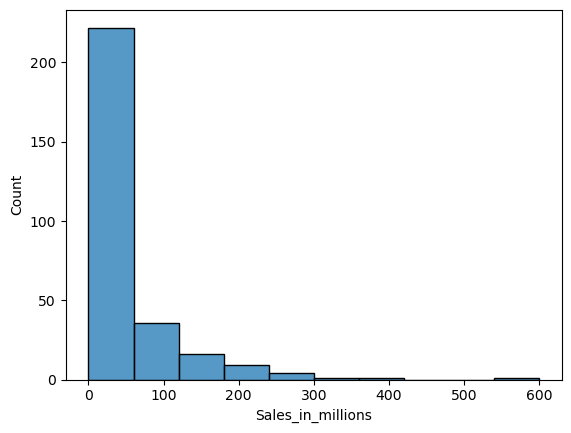

In [22]:
sns.histplot(df['Sales_in_millions'], bins=10)
plt.show

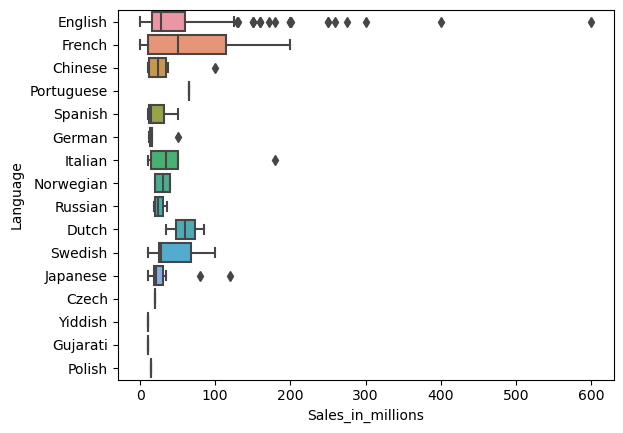

In [23]:
# A disproportionate amount of the books are in English. The Sales_in_millions values show the same distribution
sns.boxplot(x='Sales_in_millions', y='Language', data=df)
plt.show()

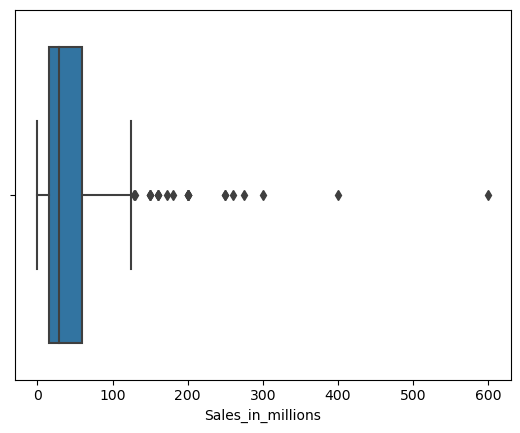

In [24]:
# Let's isolate the English books and look at the Sales_in_millions

df_eng = df.loc[(df['Language']=='English')]

sns.boxplot(x='Sales_in_millions', data=df_eng)
plt.show()